# Implementación del algoritmo K-means++

El objetivo de este notebook es implementar mi propia versión del algoritmo k-means expresado en el libro Liu, B., & Mining, W. D. (2011). Web Data Mining. Exploring Hyperlinks, Contents, and Usage Data. Ser. Data-Centric Systems and Applications. Springer Berlin Heidelberg. Capítulo 4 - Unsupervised Learning.

La implementación se realizará usando el lenguaje de programación Python.

A su vez, como datos de entrada se usarán los pertencientes al archivo dataset1.csv en la carpeta Datasets.

Primero importamos la librería matplotlib para la representación de valores en una gráfica de 2 dimensiones.
También importamos la librería random para generar números aleatorios.

In [193]:
import matplotlib.pyplot as plt
import random
import math

Acto seguido cogemos los valores del fichero de entrada y los guardamos en un string:

In [194]:
input_values = ""
with open("Datasets/dataset1.csv") as input_file:
    input_values = input_file.read()


Ahora dividimos los datos en puntos independientes y los añadimos a una lista aparte. En esta lista hemos eliminado el primer elemento ya que actuaba de patrón indicando como se representan los valores de cada punto:

In [195]:
x = [] # List of x values
y = [] # List of y values
point_class = []
for point in input_values.splitlines()[1 :: ]:
    splitted_point = point.split(",")
    x.append(float(splitted_point[0]))
    y.append(float(splitted_point[1]))
    point_class.append(float(splitted_point[2]))

Una vez conseguidos los puntos, procedemos a representarlos en la gráfica:

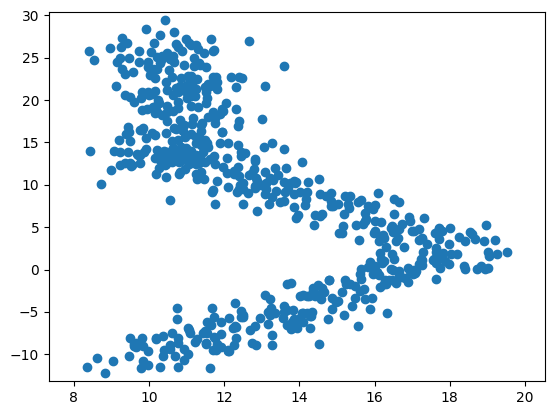

In [196]:
plt.ylim(min(y) - 1, max(y) + 1)
plt.xlim(min(x) - 1, max(x) + 1)
plt.scatter(x, y)
plt.show()

Como se puede apreciar, a la hora de representar los puntos no se tiene encuenta su clase ya que todos ellos estan superpuestos en el mismo mapa.

### Implementación de la mejora propuesta por KMeans++

Basándonos en el algoritmo K-Means creado anteriormente, procedemos a "mejorarlo" a su versión K-Means++ con el fin de dividir el conjunto de todos los datos en clústeres de una forma más consistente. La modificación que introduce esta "mejora" es la forma de seleccionar los centroides iniciales, que, al igual que en su versión no mejorada, no se podrán repetir. Estos centroides iniciales se seleccionaran de la siguiente forma:
    
1. Se selecciona el primer centro de forma aleatoria entre todos los puntos del dataset.
2. Una vez seleccionado el centroide, se calcula la distancia de todos los puntos del dataset y se asignan al centroide más cercano a cada uno de ellos.
3. Cuando todos los puntos se han asignado a un centroide, se procede a escoger como centroide para otro clúster el punto más lejano al centroide del clúster que acabamos de crear. (Si acabábamos de crear el centroide número K, entonces el algoritmo debería parar y no seguir calculando centros.)

Se ha extraido el fragmento de selección de centros iniciales con el fin de mostrar de forma más precisa los cambios realizados. Se puede apreciar que conviven la versión antigua y la nueva, pero el propósito de la coexistecia de ambas es símplemente para la comparación de resultados entre ambas versiones. 

La siguiente función calcula la media de todos los puntos de un clúster con el fin de hallar un nuevo centro para el clúster.

In [197]:
def mean(list): # Función que calcula la media de una lista
    acc = 0
    for i in list:
        acc = acc + i
    return acc/len(list)

El siguiente fragmento de código pertenece a la selección de centroides iniciales de forma aleatoria propuesta por el algoritmo KMeans original.

In [198]:
def initialize(k="Number of centroids", d="Data points"):
    centroids = []
    old_centroids = []
    clusters = [] # Creo K clusters con 3 listas, una para la x otra para la y y otra para la clase del punto respectivamente

    for i in range(k): # Calculo los centroides incialesNow
        point_position = -1 # posicion del centroide elegido
        while(point_position == -1): # Escogemos un numero aleatorio entre 0 y el número de puntos que tenemos, mientras los centroides estén repetidos, elijo un nuevo centroide
            point_position = random.randrange(0, len(x)-1)
            if((d[0][point_position], d[1][point_position], d[2][point_position]) in centroids): # si el centroide está repetido, escogemos uno nuevo
                point_position = -1    
        centroids.append((x[point_position], y[point_position], point_class[point_position])) # Elegimos k centroides al azar
        old_centroids.append([[], [], []])
        clusters.append([[], [], []])
    
    return centroids, old_centroids, clusters;    

Este otro fragmento es la selección de centros mediante KMeans++.

In [204]:
def initialize(k="Number of centroids", d="Data points"):
    centroids = []
    old_centroids = []
    clusters = [] # Creo K clusters con 3 listas, una para la x otra para la y y otra para la clase del punto respectivamente

    point_position = random.randrange(0, len(d[0]) - 1) # Primero selecciono un centroide aleatorio inicial.
    centroids.append((x[point_position], y[point_position], point_class[point_position]))
    distance_point_to_centroid = []
    for i in range(len(x)): # Calculo las distancias desde todos los puntos hacia el centroide
        distance_point_to_centroid.append(abs(math.sqrt(pow(centroids[0][0] - d[0][i], 2) + (pow(centroids[0][1] - d[1][i], 2)))))
    
    print(max([[1],[2]]))

    for cluster_number in range(1, k):
        # Selecciono el punto más lejano como centroide para mi nuevo clúster.
        centroid_index = distance_point_to_centroid.index(max(distance_point_to_centroid))
        centroids.append((x[centroid_index], y[centroid_index], point_class[centroid_index]))


    # Asigno los puntos al centroide más cercano
    distance_point_to_centroid
    for point in range(len(d[0]) - 1):

    for i in range(k): # Calculo los centroides inciales
        point_position = -1 # posicion del centroide elegido
        while(point_position == -1): # Escogemos un numero aleatorio entre 0 y el número de puntos que tenemos, mientras los centroides estén repetidos, elijo un nuevo centroide
            point_position = random.randrange(0, len(x)-1)
            if((d[0][point_position], d[1][point_position], d[2][point_position]) in centroids): # si el centroide está repetido, escogemos uno nuevo
                point_position = -1    
        centroids.append((x[point_position], y[point_position], point_class[point_position])) # Elegimos k centroides al azar
        old_centroids.append([[], [], []])
        clusters.append([[], [], []])
    
    return centroids, old_centroids, clusters;    

IndentationError: expected an indented block after 'for' statement on line 17 (664533424.py, line 19)

El algoritmo KMeans es el mismo que en su versión anterior. Lo único que se ha hecho ha sido extraer la selección de los centroides iniciales para que sea más legible el cambio realizado. 

In [200]:
def Kmeans(k="Number of centroids", d="Data points"):
    centroids, old_centroids, clusters = initialize(k, d) # Calculamos los centroides iniciales y creamos k clusters

    while(centroids != old_centroids): # Mientras los centros no sean iguales a los antiguos centros, prosigo con el algoritmo
        for i in range(k):
            clusters[i] = [[], [], []] # Borramos el cluster creado para crear uno nuevo
            
        for i in range(len(d[0])): 
            distance_to_centroids = [] 
            # Calculo la distancia a ambos los centroides 
            for centroid in centroids:
                distance_to_centroids.append(abs(math.sqrt(pow(centroid[0] - d[0][i], 2) + (pow(centroid[1] - d[1][i], 2)))))

            # Cojo el índice del cluster que más cerca está de mi punto
            cluster_number = distance_to_centroids.index(min(distance_to_centroids))
            # Asigno al cluster el punto
            clusters[cluster_number][0].append(d[0][i])
            clusters[cluster_number][1].append(d[1][i])
            clusters[cluster_number][2].append(d[2][i])

        # Recalculamos los centros calculando el punto más cercano a la media del cluster
        cluster_number = 0 # Usado como índice para recorrer los clusteres 
        for ([coord_x, coord_y, point_c]) in clusters:
            mean_x = mean(coord_x) # Calculo la media para recomputar el centroide
            mean_y = mean(coord_y)
            distance_to_new_centroids = [] # Lista que guarda las distancias al nuevo centroide (Dicho centroide es la media)
            for i in range(len(coord_x)):
                distance_to_new_centroids.append(abs(math.sqrt(pow(mean_x - coord_x[i], 2) + (pow(mean_y - coord_y[i], 2)))))
            
            # El nuevo centro del cluster será el punto con menor distancia a la media
            index_of_closest_point = distance_to_new_centroids.index(min(distance_to_new_centroids))
            # Guardo los centroides que tenía para comprobar más tarde en la condición de parada 
            old_centroids[cluster_number] = centroids[cluster_number]
            # Reasigno los centroides
            centroids[cluster_number] = (coord_x[index_of_closest_point], coord_y[index_of_closest_point], point_c[index_of_closest_point])
            # Actualizo el índice para acceder al siguiente cluster en la siguiente interación
            cluster_number += 1

    return clusters

Una vez implementado el algoritmo, podemos apreciar como se diferencian k grupos principales de datos al mostrar los clústeres obtenido.

In [203]:
clusters = Kmeans(3, (x, y, point_class))
for cluster in clusters:
    plt.ylim(min(y) - 1, max(y) + 1)
    plt.xlim(min(x) - 1, max(x) + 1)
    plt.scatter(cluster[0], cluster[1])
plt.show()

[(17.70388737, 3.56474316, 2.0), (10.42782892, 29.43729693, 0.0)]


IndexError: list index out of range

Una vez desarrollado y probado que se muestran los datos correctamente, procedemos a comprobar que la salida mostrada por el algoritmo k-means de la librería sklearn es muy similar. Por lo tanto, importamos la librería.

In [ ]:
from sklearn.cluster import KMeans

Una vez importado, usamos la librería para calcular el resultado.

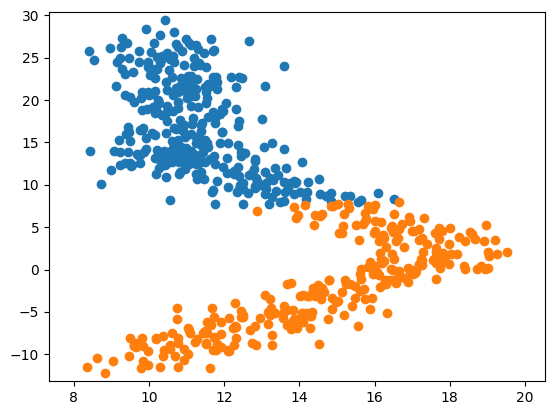

In [ ]:
number_of_clusters = 2 # Define el número de clústers que se van a crear

labels = KMeans(n_clusters=number_of_clusters).fit_predict(list(zip(x,y)))


plt.ylim(min(y) - 1, max(y) + 1)
plt.xlim(min(x) - 1, max(x) + 1)

clusters = []

for i in range(number_of_clusters):
    clusters.append([[], []])

for cluster_number in range(number_of_clusters):
    for i in range(len(labels)):
        if(labels[i] == cluster_number):
            clusters[cluster_number][0].append(x[i])
            clusters[cluster_number][1].append(y[i])
            
            
plt.ylim(min(y) - 1, max(y) + 1)
plt.xlim(min(x) - 1, max(x) + 1)
for cluster in clusters:
    plt.scatter(cluster[0], cluster[1])
plt.show()